In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("../data/evaluation_data_final.csv")

In [60]:
map = {
    "Decision Tree": "Decison Tree",
    "Random Forest": "Random Forest",
    "LSTM": "LSTM"
}
def mapper(x):
    
    for val in map.keys():
        if val in x:
            return map[val]
    return None
    
df['type'] = df['Model'].apply(mapper)
df['Log_Runtime'] = np.log(df['Runtime'])
metrics = ['Runtime', 'Log_Runtime', 'Accuracy', 'F1']

mean_data = df.groupby("type")[metrics].mean()
mean_data

,Runtime,Log_Runtime,Accuracy,F1
type,,,,
Decison Tree,7.965,1.650097,0.703332,0.694809
LSTM,6011.540,7.239957,0.805876,0.764753
Random Forest,25.645,2.016624,0.867149,0.866338


In [5]:
bbc = df[df['data']=="bbc news"].set_index("Model")
sarc = df[df['data']=="sarcasm detection"].set_index("Model")

df['fine_tune'] = df['Model'].apply(lambda x: "fine-tuned" in x)
simple = df[df['fine_tune'] == False].set_index("Model")
fine_tuned = df[df['fine_tune'] == True].set_index("Model")

In [6]:
simple

,Runtime,Accuracy,F1,data,type,fine_tune
Model,,,,,,
Decision Tree,0.73,0.849438,0.849514,bbc news,Decison Tree,False
Decision Tree,14.38,0.730084,0.729078,sarcasm detection,Decison Tree,False
Random Forest,0.42,0.970787,0.970774,bbc news,Random Forest,False
Random Forest,10.27,0.767121,0.764883,sarcasm detection,Random Forest,False
LSTM,402.97,0.957303,0.957100,bbc news,LSTM,False
LSTM,138.59,0.790881,0.790951,sarcasm detection,LSTM,False


# Accuracy

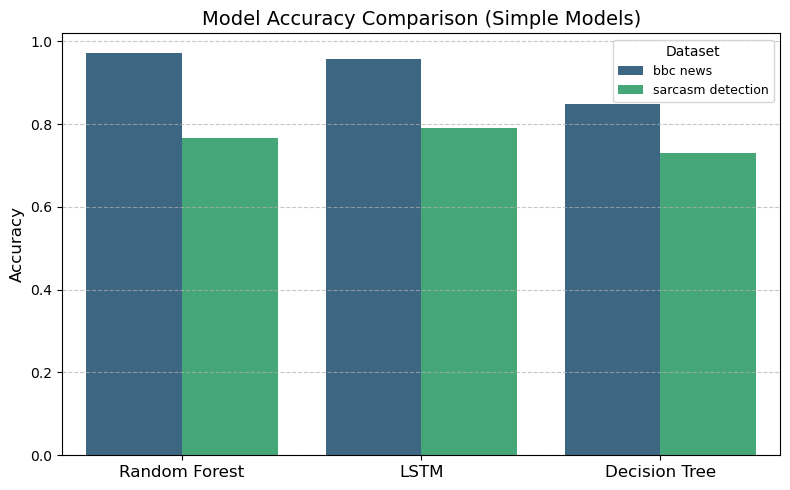

In [109]:
simple_sorted = simple.sort_values(by='Accuracy', ascending=False)
# fine_tuned_sorted = fine_tuned.sort_values(by='Accuracy', ascending=False)

# # Create the subplots
# fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# # Plot for simple models
# sns.barplot(data=simple_sorted, x=simple_sorted.index, y="Accuracy", hue="data", palette="viridis", ax=axes[0])
# axes[0].set_title('Model Accuracy Comparison (Simple Models)', fontsize=20)
# axes[0].set_xlabel('')
# axes[0].set_ylabel('Accuracy', fontsize=16)
# axes[0].tick_params(axis='x', rotation=0, labelsize = 16)
# axes[0].grid(axis='y', linestyle='--', alpha=0.7)
# axes[0].legend(title='Dataset', fontsize=14)

# # Plot for fine-tuned models
# sns.barplot(data=fine_tuned_sorted, x=fine_tuned_sorted.index, y="Accuracy", hue="data", palette="viridis", ax=axes[1])
# axes[1].set_title('Model Accuracy Comparison (Fine-tuned Models)', fontsize=20)
# axes[1].set_xlabel('')
# axes[1].set_ylabel('')  # No y-label as it's shared
# axes[1].tick_params(axis='x', rotation=0, labelsize = 16)
# axes[1].grid(axis='y', linestyle='--', alpha=0.7)
# axes[1].legend(title='Dataset', fontsize=14)

# plt.tight_layout()

plt.figure(figsize=(8,5))
sns.barplot(data=simple_sorted, x=simple_sorted.index, y="Accuracy", hue="data", palette="viridis")
plt.title('Model Accuracy Comparison (Simple Models)', fontsize=14)
plt.xlabel('')
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Dataset', fontsize=9)
plt.tight_layout()

# Runtime

In [72]:
# simple_sorted = simple.sort_values(by='Runtime', ascending=False)
# fine_tuned_sorted = fine_tuned.sort_values(by='Runtime', ascending=False)

# # Create the subplots
# fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# # Plot for simple models
# sns.barplot(data=simple_sorted, x=simple_sorted.index, y="Runtime", hue="data", palette="viridis", ax=axes[0])
# axes[0].set_title('Model Training Time Comparison (Simple Models)', fontsize=20)
# axes[0].set_xlabel('')
# axes[0].set_ylabel('Runtime', fontsize=16)
# axes[0].tick_params(axis='x', rotation=0, labelsize=16)
# axes[0].grid(axis='y', linestyle='--', alpha=0.7)
# axes[0].legend(title='Dataset', fontsize=14)

# # Plot for fine-tuned models
# sns.barplot(data=fine_tuned_sorted, x=fine_tuned_sorted.index, y="Runtime", hue="data", palette="viridis", ax=axes[1])
# axes[1].set_title('Model Training Time Comparison (Fine-tuned Models)', fontsize=20)
# axes[1].set_xlabel('')
# axes[1].set_ylabel('')  # No y-label as it's shared
# axes[1].tick_params(axis='x', rotation=0, labelsize=16)
# axes[1].grid(axis='y', linestyle='--', alpha=0.7)
# axes[1].legend(title='Dataset', fontsize=14)

# plt.tight_layout()

In [54]:
s_df = simple_sorted[['Runtime', 'data']]
s_df['Log_Runtime'] = np.log(s_df['Runtime']).round(2)
s_df[['Runtime', 'Log_Runtime', 'data']].sort_values(by="Log_Runtime", ascending=False)

/var/folders/8c/_sr2kqv935l1jvwxjljct8680000gn/T/ipykernel_65385/1655337999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_df['Log_Runtime'] = np.log(s_df['Runtime']).round(2)


,Runtime,Log_Runtime,data
Model,,,
LSTM,402.97,6.00,bbc news
LSTM,138.59,4.93,sarcasm detection
Decision Tree,14.38,2.67,sarcasm detection
Random Forest,10.27,2.33,sarcasm detection
Decision Tree,0.73,-0.31,bbc news
Random Forest,0.42,-0.87,bbc news


In [55]:
ft_df = fine_tuned[['Runtime', 'data']]
ft_df['Log_Runtime'] = np.log(ft_df['Runtime']).round(2)
ft_df[['Runtime', 'Log_Runtime', 'data']].sort_values(by="Log_Runtime", ascending=False)

/var/folders/8c/_sr2kqv935l1jvwxjljct8680000gn/T/ipykernel_65385/751867356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ft_df['Log_Runtime'] = np.log(ft_df['Runtime']).round(2)


,Runtime,Log_Runtime,data
Model,,,
LSTM fine-tuned,20148.40,9.91,bbc news
LSTM fine-tuned,3356.20,8.12,sarcasm detection
Random Forest fine-tuned,82.99,4.42,sarcasm detection
Random Forest fine-tuned,8.90,2.19,bbc news
Decision Tree fine-tuned,8.67,2.16,sarcasm detection
Decision Tree fine-tuned,8.08,2.09,bbc news


# F1

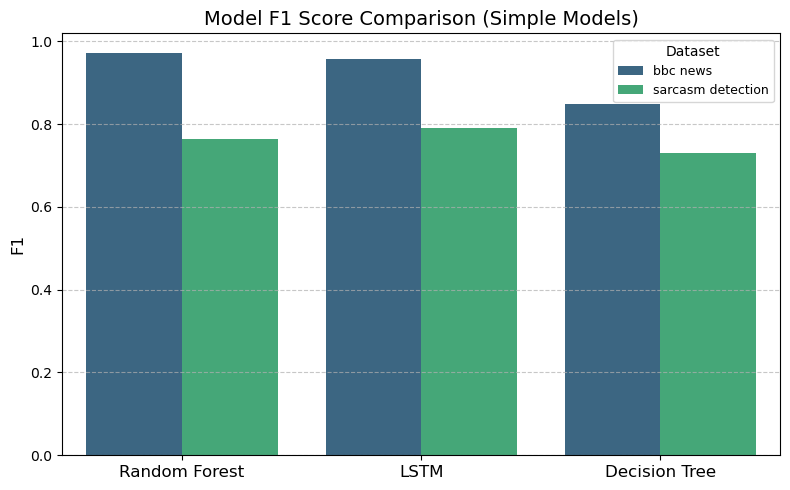

In [110]:
simple_sorted = simple.sort_values(by='F1', ascending=False)
fine_tuned_sorted = fine_tuned.sort_values(by='F1', ascending=False)

# # Create the subplots
# fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# # Plot for simple models
# sns.barplot(data=simple_sorted, x=simple_sorted.index, y="F1", hue="data", palette="viridis", ax=axes[0])
# axes[0].set_title('Model F1 Score Comparison (Simple Models)', fontsize=20)
# axes[0].set_xlabel('')
# axes[0].set_ylabel('F1', fontsize=16)
# axes[0].tick_params(axis='x', rotation=0, labelsize=16)
# axes[0].grid(axis='y', linestyle='--', alpha=0.7)
# axes[0].legend(title='Dataset', fontsize=14)

# # Plot for fine-tuned models
# sns.barplot(data=fine_tuned_sorted, x=fine_tuned_sorted.index, y="F1", hue="data", palette="viridis", ax=axes[1])
# axes[1].set_title('Model F1 Score Comparison (Fine-tuned Models)', fontsize=20)
# axes[1].set_xlabel('')
# axes[1].set_ylabel('')  # No y-label as it's shared
# axes[1].tick_params(axis='x', rotation=0, labelsize=16)
# axes[1].grid(axis='y', linestyle='--', alpha=0.7)
# axes[1].legend(title='Dataset', fontsize=14)

# plt.tight_layout()


# Plot for simple models

plt.figure(figsize=(8,5))
sns.barplot(data=simple_sorted, x=simple_sorted.index, y="F1", hue="data", palette="viridis")
plt.title('Model F1 Score Comparison (Simple Models)', fontsize=14)
plt.xlabel('')
plt.ylabel('F1', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Dataset', fontsize=9)
plt.tight_layout()

# Data Aggregation (Mean)

In [68]:
mean_data = mean_data.reset_index()
mean_data_logruntime_sorted = mean_data.sort_values(by='Log_Runtime', ascending=False)
mean_data_accuracy_sorted = mean_data.sort_values(by='Accuracy', ascending=False)
mean_data_f1_sorted = mean_data.sort_values(by='F1', ascending=False)

In [69]:
mean_data

,level_0,index,type,Runtime,Log_Runtime,Accuracy,F1
0,0,0,Decison Tree,7.965,1.650097,0.703332,0.694809
1,1,1,LSTM,6011.540,7.239957,0.805876,0.764753
2,2,2,Random Forest,25.645,2.016624,0.867149,0.866338


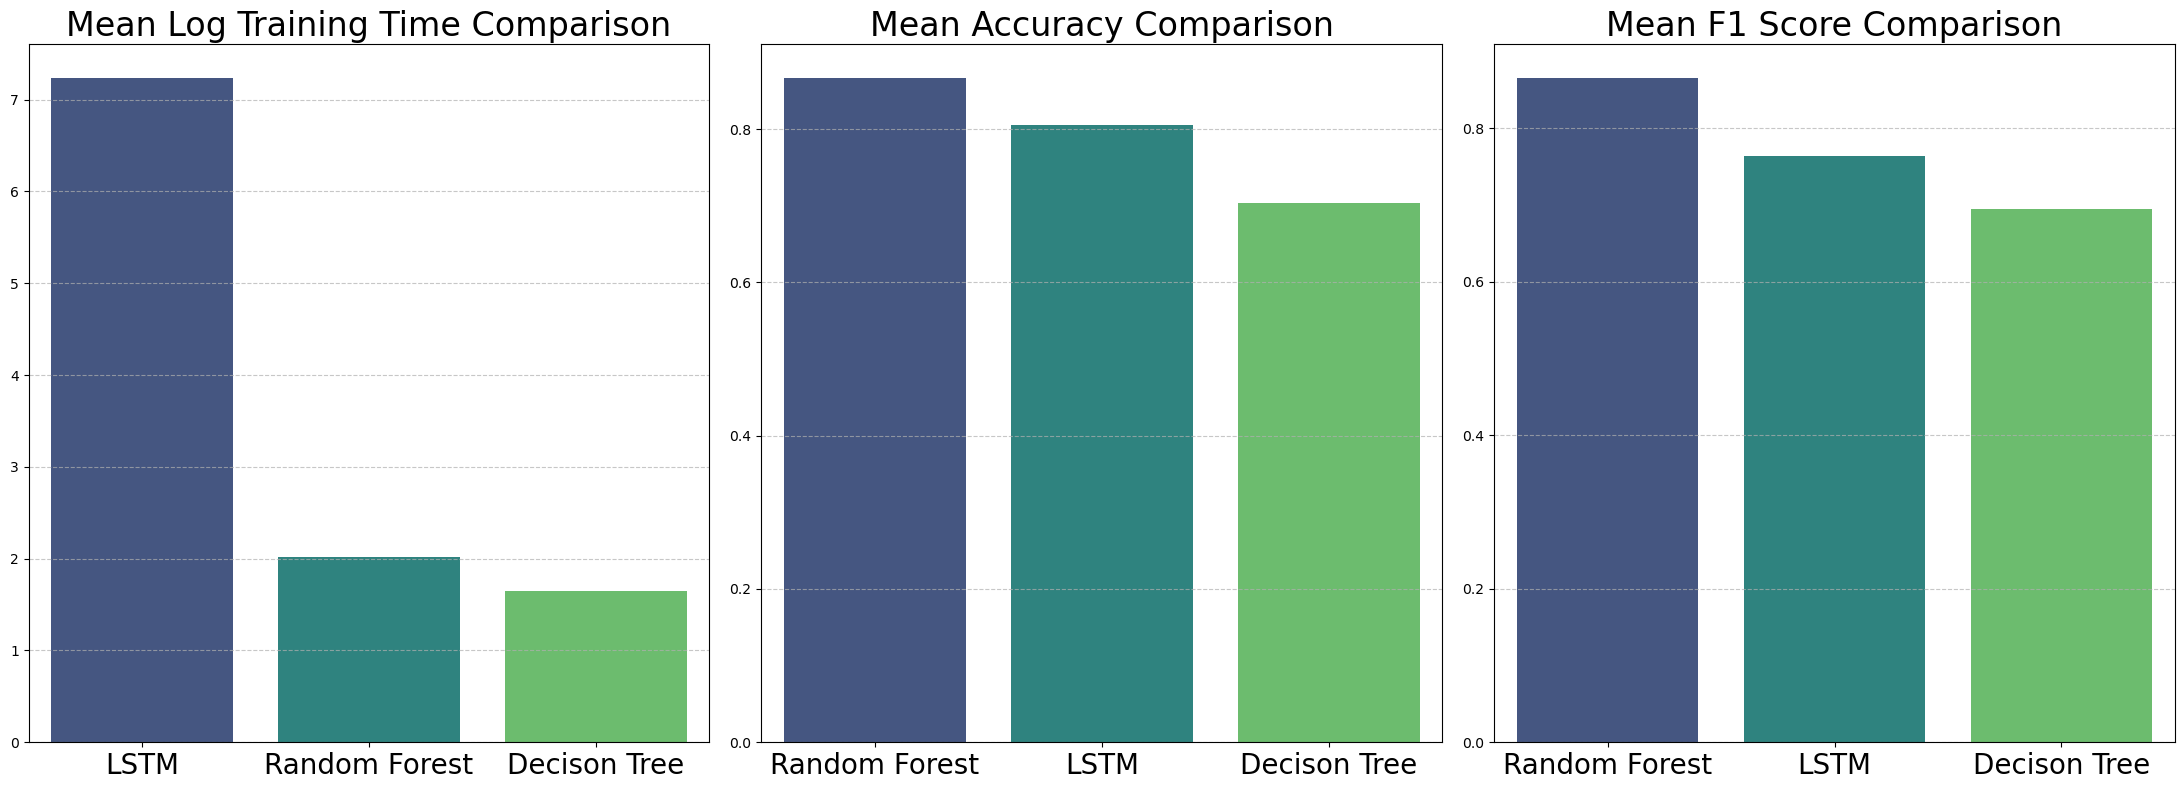

In [115]:
# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(22, 8))

# Plot for Runtime
sns.barplot(data=mean_data_logruntime_sorted, x='type', y='Log_Runtime', palette="viridis", ax=axes[0])
axes[0].set_title('Mean Log Training Time Comparison', fontsize=24)
axes[0].set_xlabel('')
axes[0].set_ylabel('', fontsize=20)
axes[0].tick_params(axis='x', rotation=0, labelsize=20)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Accuracy
sns.barplot(data=mean_data_accuracy_sorted, x='type', y='Accuracy', palette="viridis", ax=axes[1])
axes[1].set_title('Mean Accuracy Comparison', fontsize=24)
axes[1].set_xlabel('')
axes[1].set_ylabel('', fontsize=20)
axes[1].tick_params(axis='x', rotation=0, labelsize=20)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for F1 Score
sns.barplot(data=mean_data_f1_sorted, x='type', y='F1', palette="viridis", ax=axes[2])
axes[2].set_title('Mean F1 Score Comparison', fontsize=24)
axes[2].set_xlabel('')
axes[2].set_ylabel('', fontsize=20)
axes[2].tick_params(axis='x', rotation=0, labelsize=20)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()